In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')


**Check the head of customers, and check out its info() and describe() methods.**

In [2]:
df = pd.read_csv('delivery_time.csv')
df.head(20)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Delivery Time and Sorting Time columns. Does the correlation make sense?**

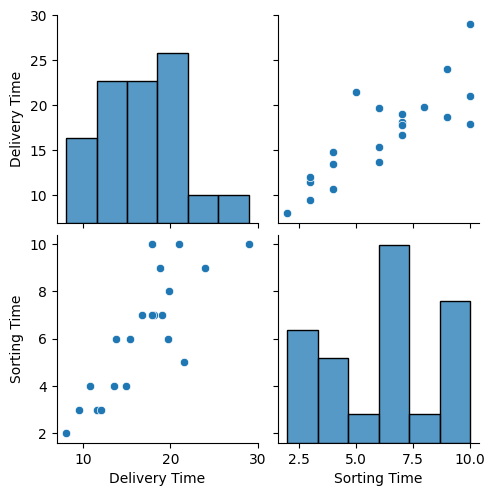

In [5]:
sns.pairplot(df)

In [77]:
df1=df.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)

<ipython-input-7-5df2882ba5a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['DT'])


<Axes: xlabel='DT', ylabel='Density'>

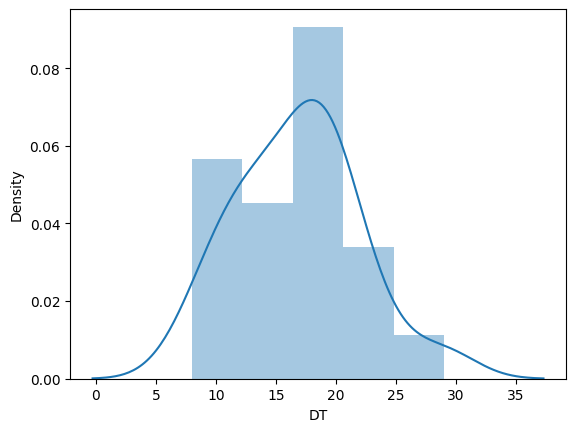

In [7]:
sns.distplot(df1['DT'])

<ipython-input-8-e6fe21fa5cbd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['ST'])


<Axes: xlabel='ST', ylabel='Density'>

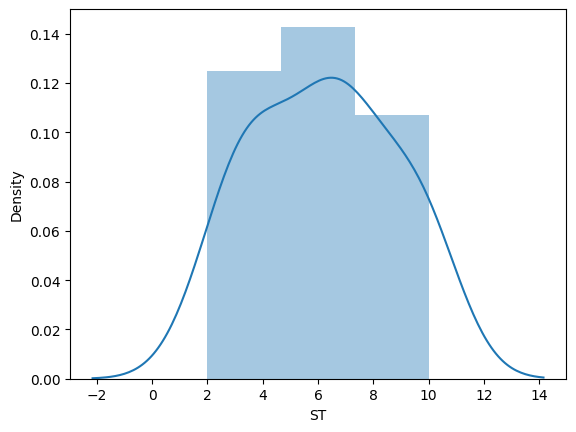

In [8]:
sns.distplot(df1['ST'])

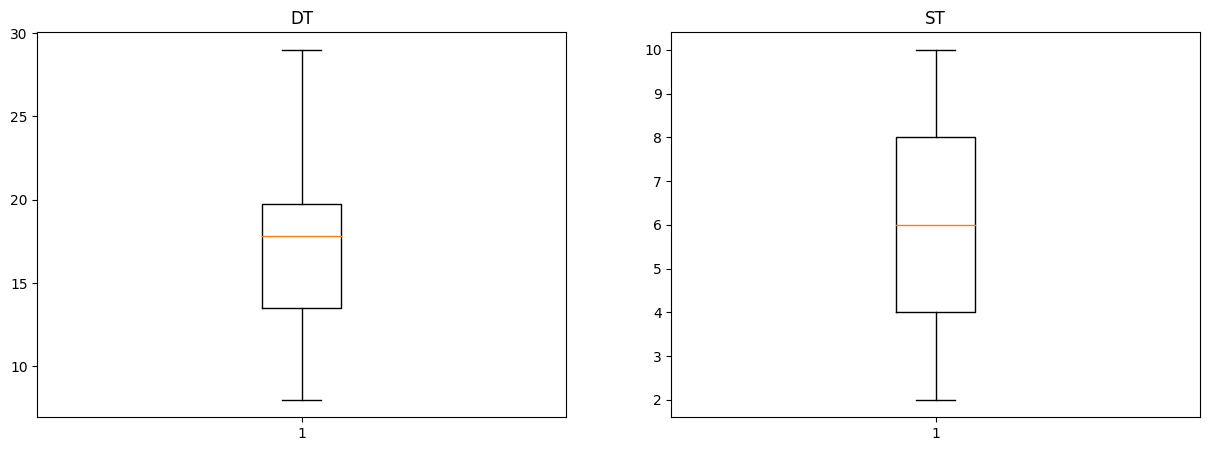

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df1['DT'])
plt.title("DT")
plt.subplot(1,2,2)
plt.boxplot(df1['ST'])
plt.title("ST")
plt.show()


Text(0.5, 1.0, 'Boxplot')

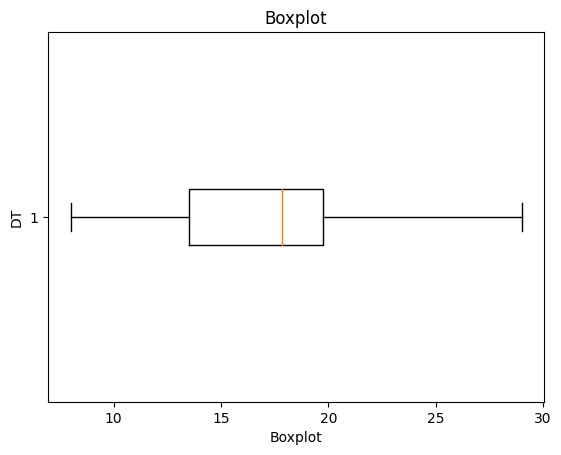

In [10]:
# vertical Boxplot
plt.boxplot(df1['DT'],vert=False)
plt.ylabel("DT")
plt.xlabel("Boxplot")
plt.title("Boxplot")

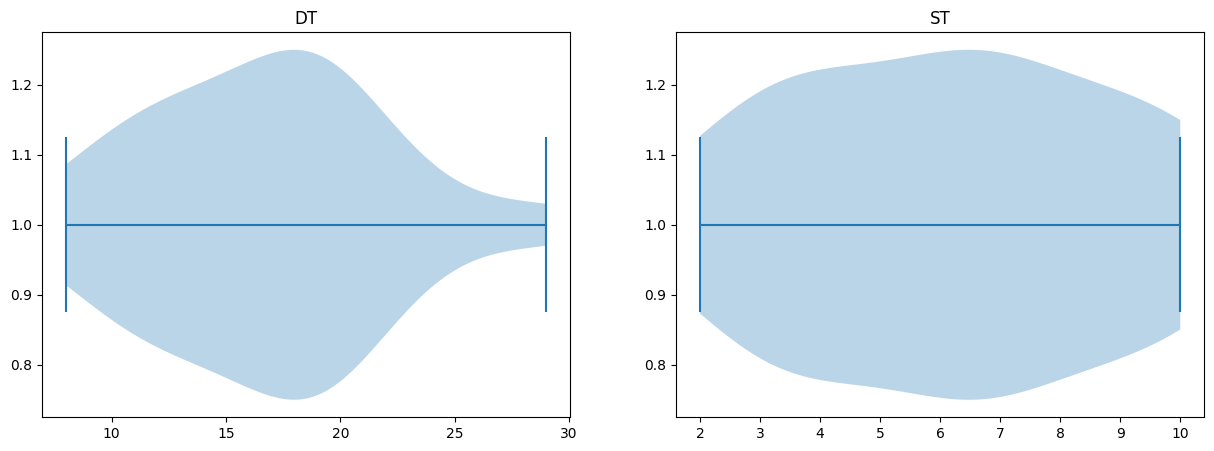

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.violinplot(df1['DT'],vert=False)
plt.title("DT")
plt.subplot(1,2,2)
plt.violinplot(df1['ST'],vert=False)
plt.title("ST")
plt.show()

In [12]:
df1.corr().style.background_gradient(cmap='coolwarm')

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


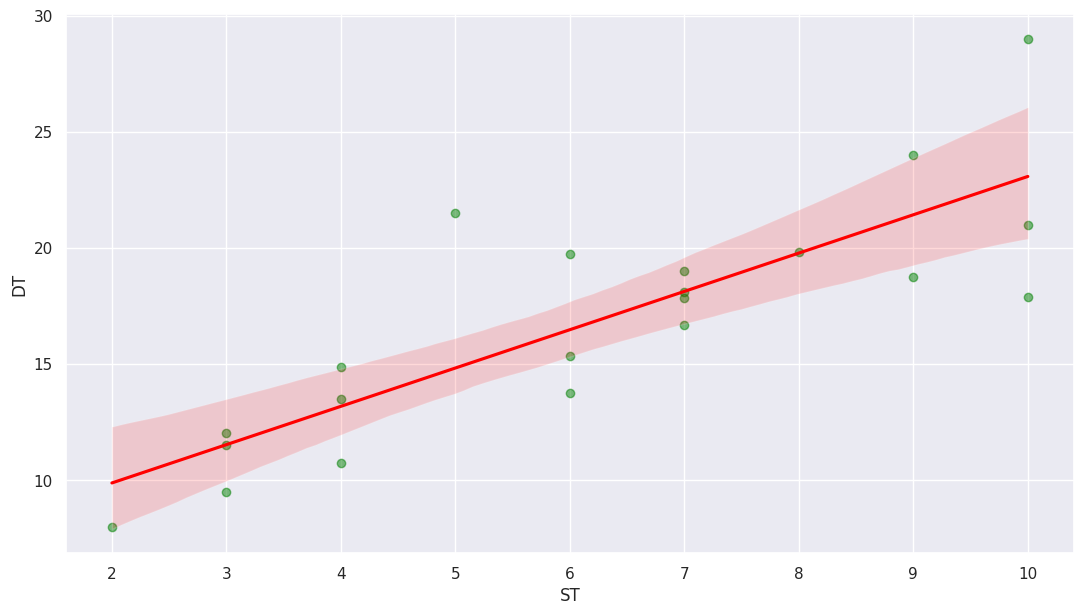

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="ST", y="DT", data=df1, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

In [14]:
x = df1[['DT']]
y = df1[['ST']]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn import metrics

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lm.intercept_)

[-0.51990077]


In [18]:
lm.coef_

array([[0.40717318]])

In [19]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf.head()

,Coefficient
DT,0.407173


In [20]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

0.861261170010851

In [21]:
y_pred

array([[3.34824444],
       [2.73748467],
       [7.52176954],
       [9.25225555],
       [4.97693716],
       [5.07873046],
       [6.73999703]])

In [22]:
y_test

,ST
7,3
18,2
2,6
3,9
1,4
16,6
19,7


Text(0, 0.5, 'Predictions')

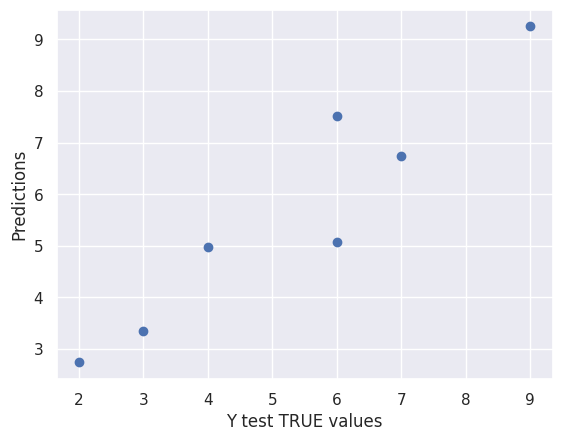

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test TRUE values')
plt.ylabel('Predictions')

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<ipython-input-24-7ff73e85f24c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=10)


<Axes: ylabel='Density'>

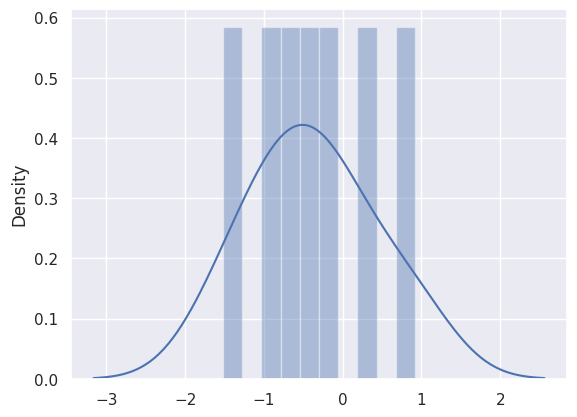

In [24]:
sns.distplot((y_test-y_pred),bins=10)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [25]:
from sklearn import metrics
# calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7168519820640499
MSE: 0.702188364026713
RMSE: 0.8379668036543649


<ipython-input-26-f3e82d05d5c2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
<ipython-input-26-f3e82d05d5c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
<ipython-input-26-f3e82d05d5c2>:6: UserWarni

Text(0.5, 1.0, 'NO Transformation')

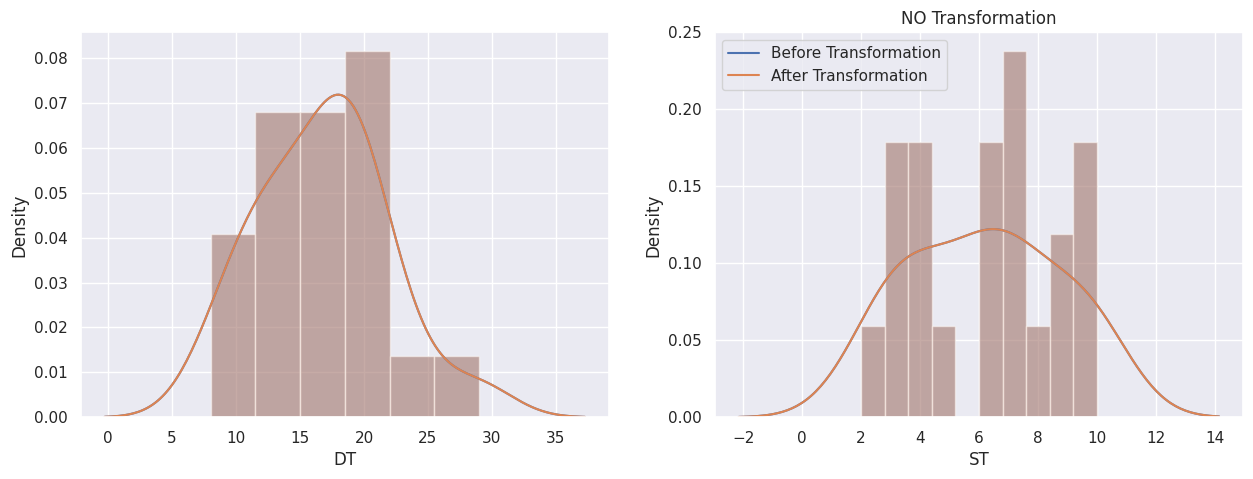

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("NO Transformation",loc='center')
sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation",loc='center')

<ipython-input-27-4b861d4a5379>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
<ipython-input-27-4b861d4a5379>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df1['DT']), bins = 6, kde = True, ax=axes[0])
<ipython-input-27-4b861d4a5379>:6: U

Text(0.5, 1.0, 'Log Transformation')

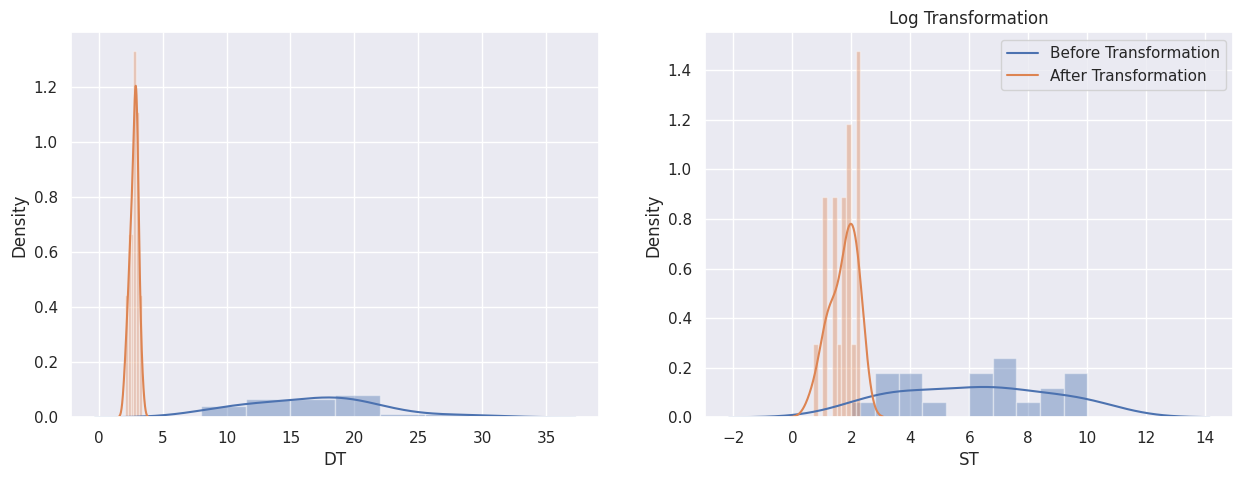

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.log(df1['DT']), bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(df1['ST']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

In [28]:
import statsmodels.formula.api as smf
model_reg = smf.ols("DT~ST",data = df1).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        14:47:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.7168519820640499
Mean Squared Error: 0.702188364026713
Root Mean Squared Error: 0.8379668036543649
R^2 Score :           0.861261170010851


# **Logrithm Transformation**

In [126]:
# Input dataset
X_log = np.log(df1['ST'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = df1['DT'].values.reshape(-1,1)


In [127]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [128]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [129]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-0.31865575]
Co-efficient Value of Log Model is :  [[10.09551654]]


In [130]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [131]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


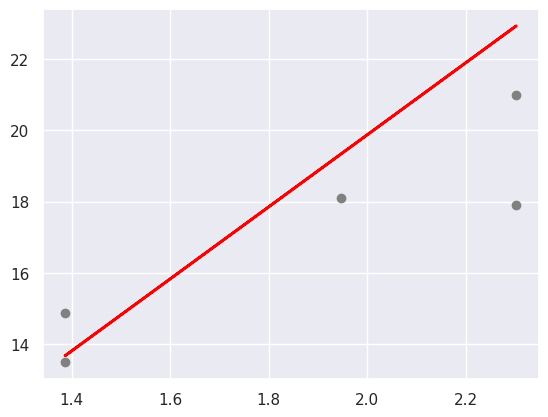

In [132]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

Calculate Error Rate of the  Logrithm Transformation model.

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349972
Root Mean Squared Error: 2.5276247210276237
R^2 Score :           0.0808965322973747


## **Exponential Transformation Model**

In [40]:
# Input dataset
X_e_log = df1['ST'].values.reshape(-1,1)

# Output or Predicted Value of data
y_e_log = np.log(df1['DT'].values.reshape(-1,1))

In [41]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [42]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [43]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [1.9917351]
 Exponent model Coefficient value is  [[0.12920274]]


In [44]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [45]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


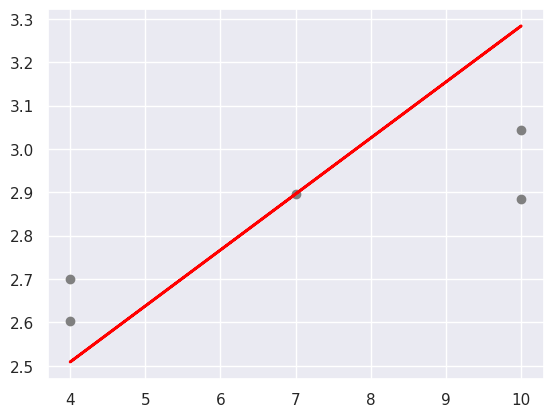

In [46]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.18482548465812512
Mean Squared Error: 0.05238618256457228
Root Mean Squared Error: 0.2288802799818549
R^2 Score :           -1.1485016492474212


# **Quadratic Transformation Model**

In [102]:
df1['Square_ST'] = df1.apply(lambda row: row.ST**2, axis =1 )
df1

,DT,ST,Square_ST
0,21.00,10,100.0
1,13.50,4,16.0
2,19.75,6,36.0
3,24.00,9,81.0
4,29.00,10,100.0
5,15.35,6,36.0
6,19.00,7,49.0
7,9.50,3,9.0
8,17.90,10,100.0
9,18.75,9,81.0


In [104]:
#X_q = df1['ST'].values.reshape(-1, 1)
#Y_q = df1['DT'].values.reshape(-1, 1)
X_q = df1.iloc[:,df1.columns != 'DT']
Y_q = df1.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)


0     10
17     7
15     4
1      4
8     10
Name: ST, dtype: int64


In [105]:
Y_q

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: ST, dtype: int64

In [106]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [107]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  0.0
            Coefficient
ST         1.000000e+00
Square_ST  1.939572e-17


In [108]:
X_q

,ST,Square_ST
0,10,100.0
1,4,16.0
2,6,36.0
3,9,81.0
4,10,100.0
5,6,36.0
6,7,49.0
7,3,9.0
8,10,100.0
9,9,81.0


In [109]:
y_pred_q_q = model.predict(X_test)

In [110]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


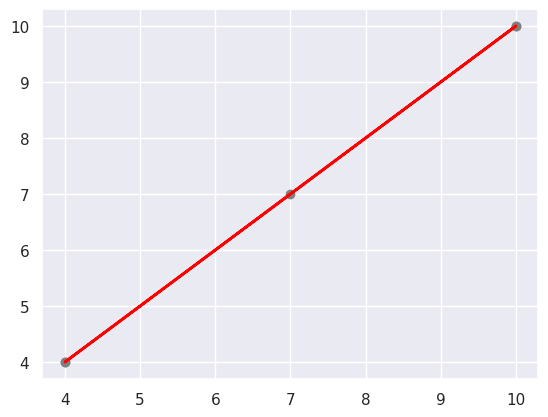

In [111]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 3.552713678800501e-16
Mean Squared Error: 2.3665827156630353e-31
Root Mean Squared Error: 4.864753555590494e-16
R^2 Score :           1.0


# **Polynomial Transformation Model**

In [113]:
df1['Cube_ST'] = df1.apply(lambda row: row.ST**3, axis =1 )
df1

,DT,ST,Square_ST,Cube_ST
0,21.00,10,100.0,1000.0
1,13.50,4,16.0,64.0
2,19.75,6,36.0,216.0
3,24.00,9,81.0,729.0
4,29.00,10,100.0,1000.0
5,15.35,6,36.0,216.0
6,19.00,7,49.0,343.0
7,9.50,3,9.0,27.0
8,17.90,10,100.0,1000.0
9,18.75,9,81.0,729.0


In [114]:
X_c = df1.iloc[:,df1.columns != 'DT']
Y_c = df1.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: ST, dtype: int64


In [115]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [116]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)


 Intercept value of Cubic Model is  8.881784197001252e-16
            Coefficient
ST         1.000000e+00
Square_ST -1.139699e-16
Cube_ST    1.377484e-17


In [117]:
y_pred_cube = cube_model.predict(X_test_c)

In [118]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


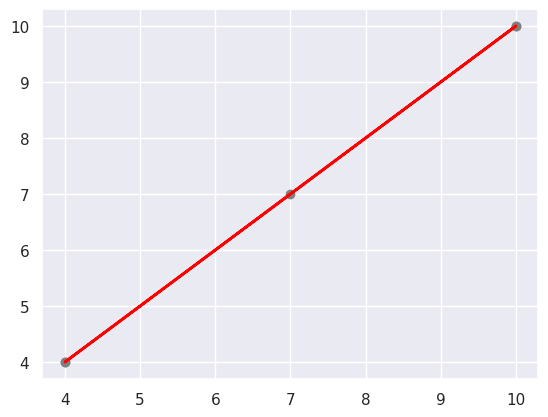

In [119]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))

Mean Absolute Error: 1.7763568394002505e-15
Mean Squared Error: 5.285368064980779e-30
Root Mean Squared Error: 2.2989928370877494e-15
R^2 Score :           1.0


# **Cubic Linear Regression Pipeline¶**

In [121]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

INPT =[('scale',StandardScaler()), ('polynomial',PolynomialFeatures()), ('model', LinearRegression()) ]
pipe =Pipeline(INPT)
pipe.fit(df1[['ST',  'Square_ST', 'Cube_ST']], df1['DT'])
pred= pipe.predict(df1[['ST',  'Square_ST', 'Cube_ST']])   

In [123]:
pmsh_exp_1 = pd.DataFrame({'Actual':df1['DT'], 'Predict': pred})
pmsh_exp_1

,Actual,Predict
0,21.00,22.598747
1,13.50,14.213636
2,19.75,17.426819
3,24.00,21.637272
4,29.00,22.598747
5,15.35,17.426819
6,19.00,17.753590
7,9.50,10.573784
8,17.90,22.598747
9,18.75,21.637272


In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df1['DT'], pred))  
print('Mean Squared Error:', metrics.mean_squared_error(df1['DT'], pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df1['DT'], pred)))
print("R^2 Score :          ", metrics.r2_score(df1['DT'], pred))

Mean Absolute Error: 2.0442687603217546
Mean Squared Error: 7.00723058977034
Root Mean Squared Error: 2.6471174114062905
R^2 Score :           0.7143195127190574


WE have found that while transform the model, got various values for MAE, RMSE, MSE and R2
 Values. Summery of the following Models


---


Simple linear Regression Model
Mean Absolute Error: 0.7168519820640499
Mean Squared Error: 0.702188364026713
Root Mean Squared Error: 0.8379668036543649
R^2 Score :           0.861261170010851


---


Logrithm Transformation Model
Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349972
Root Mean Squared Error: 2.5276247210276237
R^2 Score :           0.0808965322973747


---

Exponential Transformation Model
Mean Absolute Error: 3.552713678800501e-16
Mean Squared Error: 2.3665827156630353e-31
Root Mean Squared Error: 4.864753555590494e-16
R^2 Score :           1.0


---


Quadratic Transformation Model
 Mean Absolute Error: 1.7763568394002505e-15
Mean Squared Error: 5.285368064980779e-30
Root Mean Squared Error: 2.2989928370877494e-15
R^2 Score :           1.0



---



Cubic Transformation Model
 Mean Absolute Error: 2.0442687603217546
Mean Squared Error: 7.00723058977034
Root Mean Squared Error: 2.6471174114062905
R^2 Score :           0.7143195127190574